# Práctica 4 "Transformación de datos numéricos habilidades en primates"

In [8]:

import pandas as pd

path = 'ability.csv'
df = pd.read_csv(path, encoding='latin', error_bad_lines=False)
df.head()

,Unnamed: 0,cov.general,cov.picture,cov.blocks,cov.maze,cov.reading,cov.vocab,center,n.obs
0,general,24.641,5.991,33.520,6.023,20.755,29.701,0,112
1,picture,5.991,6.700,18.137,1.782,4.936,7.204,0,112
2,blocks,33.520,18.137,149.831,19.424,31.430,50.753,0,112
3,maze,6.023,1.782,19.424,12.711,4.757,9.075,0,112
4,reading,20.755,4.936,31.430,4.757,52.604,66.762,0,112


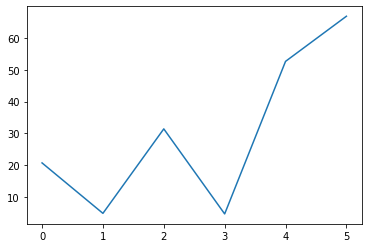

In [9]:
df['cov.reading'].plot()

In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

aux=df[['cov.reading']].copy()
train_data,test_data=train_test_split(aux,test_size=0.2)
train_data.shape,test_data.shape

((4, 1), (2, 1))

## Estandarizamos


In [11]:
scaler = StandardScaler()
scaler.fit(train_data)

print("transformación train:\n", pd.DataFrame(scaler.transform(train_data)))
print("transformación test:\n", pd.DataFrame(scaler.transform(test_data)))

transformación train:
           0
0 -0.321878
1  1.193861
2  0.586484
3 -1.458467
transformación test:
           0
0 -0.779834
1 -1.466146


## Vemos medidas de tendencia central

In [12]:
print("media:", scaler.mean_)
print("desviación estándar:", scaler.var_)

media: [38.933]
desviación estándar: [543.360125]


## Aplicamos Escala min-max
La escala mín-máx es otra de las simples transformaciones de las variables numéricas. Con la escala mín-máx, los valores deben ser convertidos a los valores dentro de [0,1].

In [13]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit(train_data)

print("transformación train:\n", pd.DataFrame(scaler.transform(train_data)))
print("transformación test:\n", pd.DataFrame(scaler.transform(test_data)))

transformación train:
           0
0  0.428525
1  1.000000
2  0.771002
3  0.000000
transformación test:
           0
0  0.255863
1 -0.002895


## Aplicamos transformacion logaritmica
 las transformaciones logarítmicas pueden ajustar la distribución de los datos a una distribución menos sesgada, por ejemplo, de tipo gaussiano.

In [14]:
import pandas as pd
import numpy as np


print("train:\n", train_data)
print("transformación train:\n", pd.DataFrame(np.log1p(train_data)))

train:
    cov.reading
2       31.430
5       66.762
4       52.604
1        4.936
transformación train:
    cov.reading
2     3.479084
5     4.216002
4     3.981624
1     1.781036


## Transformación Yeo-Johnson
La transformación de Yeo-Johnson es una función compuesta de transformación que permite valores negativos, a diferencia de la transformación de Box-Cox.

In [15]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer(method='yeo-johnson')
pt.fit(train_data)
train_data_trans = pt.transform(train_data)
print("train:\n", train_data)
print("transformación train:\n", pd.DataFrame(train_data_trans))

print("lambdas:",pt.lambdas_) # Automatically selected 
print("media:", np.mean(train_data_trans)) 
print("desviación estándar:", np.std(train_data_trans)) 

train:
    cov.reading
2       31.430
5       66.762
4       52.604
1        4.936
transformación train:
           0
0 -0.247163
1  1.143802
2  0.607295
3 -1.503934
lambdas: [0.82209077]
media: -1.6653345369377348e-16
desviación estándar: 1.0


## Recorte
El recorte (clipping) es un enfoque para limitar o reducir los valores en puntos de valor específicos. Esto puede eliminar los valores atípicos, a costa de una posible pérdida de información de datos. El recorte se puede hacer fácilmente por medio de la función de clip de pandas o numpy. El siguiente código recorta los valores en el 1% y el 99% de los datos.

In [18]:
import pandas as pd

df = pd.DataFrame(np.random.randint(0,100,size=(10, 2)), columns=['cov.general','cov.reading'])
df

,cov.general,cov.reading
0,87,46
1,92,4
2,19,36
3,28,85
4,8,25
5,98,69
6,60,49
7,40,25
8,21,76
9,50,79


In [19]:
p25 = aux[cols].quantile(0.25)
p75 = aux[cols].quantile(0.75)
print("p01:\n", p25)
print("p99:\n", p75)

p01:
 cov.general     9.70600
cov.reading     8.89075
cov.vocab      14.23150
Name: 0.25, dtype: float64
p99:
 cov.general    28.43600
cov.reading    47.31050
cov.vocab      62.75975
Name: 0.75, dtype: float64


In [20]:
df[['cov.general','cov.reading']] = df[['cov.general','cov.reading']].clip(p25,p75,axis=1).astype('int')
df[['cov.general','cov.reading']]

,cov.general,cov.reading
0,28,46
1,28,8
2,19,36
3,28,47
4,9,25
5,28,47
6,28,47
7,28,25
8,21,47
9,28,47


## RankGauss
RankGauss es un enfoque para convertir los valores a rangos, y después convierte estos rangos a otro valor numérico siguiendo una distribución Gaussiana 

In [40]:
df.rename(columns={'cov.general': 'covgeneral','cov.reading': 'covreading'}, inplace=True)

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import QuantileTransformer

df = pd.DataFrame(np.random.randint(0,100,size=(10, 2)), columns=['covgeneral','covreading'])
df

,covgeneral,covreading
0,36,28
1,7,94
2,40,46
3,45,94
4,5,96
5,55,25
6,16,32
7,71,18
8,3,85
9,24,92


In [42]:
transformer = QuantileTransformer(n_quantiles=10, random_state=1111, output_distribution='normal')
transformer.fit(df[['covgeneral']])
df['covgeneral_RankGauss'] = transformer.transform(df[['covgeneral']])
df[['covgeneral','covgeneral_RankGauss']]

,covgeneral,covgeneral_RankGauss
0,36,0.139710
1,7,-0.764710
2,40,0.430727
3,45,0.764710
4,5,-1.220640
5,55,1.220640
6,16,-0.430727
7,71,5.199338
8,3,-5.199338
9,24,-0.139710


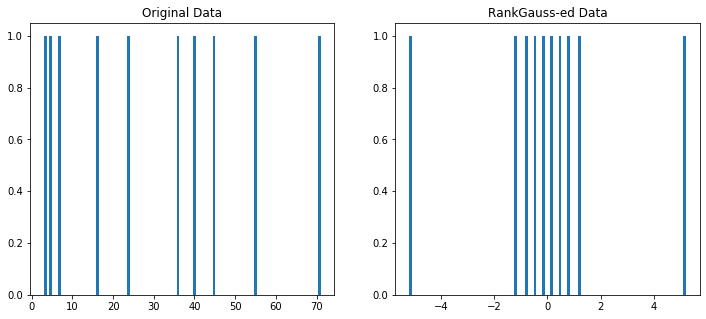

In [44]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=[12,5])
ax1.hist(df['covgeneral'],bins=100)
ax1.title.set_text('Original Data')
ax2.hist(df['covgeneral_RankGauss'],bins=100)
ax2.title.set_text('RankGauss-ed Data')
plt.show()

## Rango
Este método funciona convirtiendo los valores numéricos en rangos de valores. Cuando se analiza el número de clientes en una tienda, es probable que el número de clientes en días festivos sea mucho mayor que el de los días de semana. Cambiar los números a rangos puede neutralizar el impacto del número absoluto de clientes.

In [36]:
df.rename(columns={'cov.picture': 'covpicture'}, inplace=True)

In [37]:
import pandas as pd

df = pd.DataFrame(np.random.randint(0,100,size=(10, 1)), columns=['covpicture'])
df

,covpicture
0,32
1,4
2,34
3,22
4,97
5,74
6,60
7,89
8,47
9,43


In [38]:
df['covpicture_rank'] = df.covpicture.rank().astype('int')  
df[['covpicture','covpicture_rank']]

,covpicture,covpicture_rank
0,32,3
1,4,1
2,34,4
3,22,2
4,97,10
5,74,8
6,60,7
7,89,9
8,47,6
9,43,5
